Q2

using cv2.matchTemplate

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

In [3]:


image = cv2.imread('birds.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread('bird_template_2.jpg', 0)  

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)

threshold =0.57
binary_mask = np.where(result >= threshold, 255, 0).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area = 100  
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

result_image = image.copy() 

for contour in filtered_contours:
    x, y, _, _ = cv2.boundingRect(contour)
    template_height, template_width = template.shape[:2]
    cv2.rectangle(result_image, (x, y), (x + template_width, y + template_height), (0, 255, 0), 2)

cv2.imwrite('Segmented Birds.jpg', result_image)
cv2.destroyAllWindows() 

code from scratch

In [2]:
image = cv2.imread('birds.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread('bird_template_2.jpg', 0)  

template_height, template_width = template.shape[:2]
result_height = gray.shape[0] - template_height + 1
result_width = gray.shape[1] - template_width + 1
result = np.zeros((result_height, result_width), dtype=np.float32)

template_norm = cv2.normalize(template.astype(np.float32), None, 0, 1, cv2.NORM_MINMAX)

for y in range(result_height):
    for x in range(result_width):
        patch = gray[y : y + template_height, x : x + template_width].astype(np.float32)
        patch_norm = cv2.normalize(patch, None, 0, 1, cv2.NORM_MINMAX)
        result[y, x] = np.sum(patch_norm * template_norm)

threshold = 0.57
binary_mask = np.where(result >= threshold, 255, 0).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_contour_area = 100  
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

result_image = image.copy() 

for contour in filtered_contours:
    x, y, _, _ = cv2.boundingRect(contour)
    template_height, template_width = template.shape[:2]
    cv2.rectangle(result_image, (x, y), (x + template_width, y + template_height), (0, 255, 0), 2)

cv2.imwrite('Segmented Birds_2.jpg', result_image)
cv2.destroyAllWindows() 

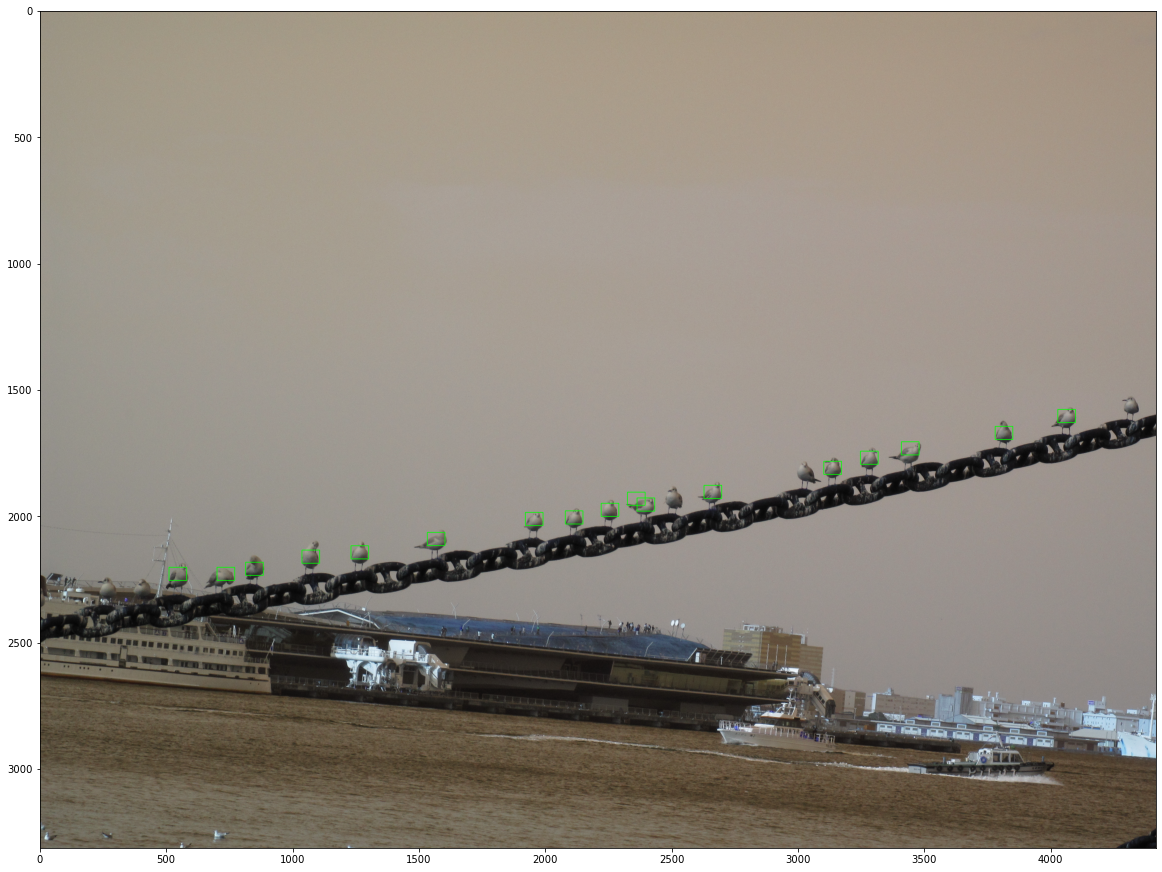

In [4]:
plt.figure(figsize=(20, 20))
plt.imshow(result_image)